In [268]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
df = pd.read_csv('train.csv')

In [269]:
#各変数のNaNの個数のチェック
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [270]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
class_mapping_1 = {'male': 0, 'female': 1}
class_mapping_2 = {'C': 0, 'Q': 1,'S':2}
df['Sex'] = df['Sex'].map(class_mapping_1)
df['Embarked'] = df['Embarked'].map(class_mapping_2)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [272]:
#Age,Embarkedに含まれるNaNを平均値で補完
df=df.fillna(df.Age.mean())
df=df.fillna(df.Embarked.mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,29.6991,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,29.6991,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,29.6991,2.0


In [273]:
#特にSurvivedに関係のなさそうな変数の削除
df2=df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [274]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
X_1 = df2.iloc[:,1:8]
y_1 = df2['Survived']
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [276]:
#ランダムフォレストで特徴量の重要度を見る
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=0, n_estimators=10)
rfc.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [277]:
features=df2.columns[1:8]

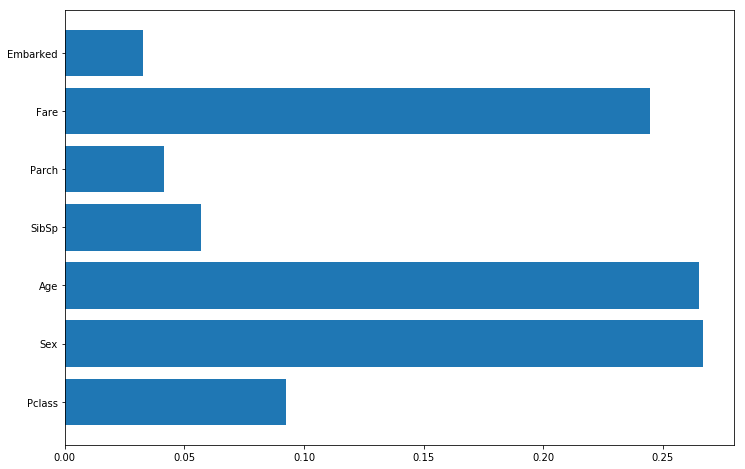

In [278]:
importances = rfc.feature_importances_
n_features =len(features)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), features)
plt.show()

In [279]:
#Sex,Age,Fareが生存に影響を与えるとわかる
#これらの変数の削除

In [280]:
df3=df2.drop(['Parch','SibSp','Pclass','Embarked'], axis=1)

In [281]:
df3.head()

,Survived,Sex,Age,Fare
0,0,0,22.0,7.2500
1,1,1,38.0,71.2833
2,1,1,26.0,7.9250
3,1,1,35.0,53.1000
4,0,0,35.0,8.0500


In [282]:
X_2 = df3.iloc[:,1:4]
y_2 = df2['Survived']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc2= RandomForestClassifier(random_state=0, n_estimators=10)
rfc2.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [283]:
 rfc2.score(X_2_test, y_2_test)

0.80597014925373134

In [284]:
dftest=pd.read_csv('test.csv')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [285]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [286]:
class_mapping_1 = {'male': 0, 'female': 1}
class_mapping_2 = {'C': 0, 'Q': 1,'S':2}
dftest['Sex'] = dftest['Sex'].map(class_mapping_1)
dftest['Embarked'] = dftest['Embarked'].map(class_mapping_2)

In [287]:
dftest=dftest.fillna(dftest.Age.mean())
dftest=dftest.fillna(dftest.Fare.mean())

In [288]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,30.2726,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,30.2726,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,30.2726,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,30.2726,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,30.2726,2


In [289]:
dftest2=dftest.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [290]:
dftest2.head()

,Sex,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [291]:
rfc2.predict_proba(dftest2)

array([[ 0.9       ,  0.1       ],
       [ 0.9       ,  0.1       ],
       [ 0.9       ,  0.1       ],
       [ 0.4       ,  0.6       ],
       [ 0.25      ,  0.75      ],
       [ 0.7       ,  0.3       ],
       [ 0.8       ,  0.2       ],
       [ 0.4       ,  0.6       ],
       [ 0.2       ,  0.8       ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.1       ,  0.9       ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.695     ,  0.305     ],
       [ 0.7       ,  0.3       ],
       [ 0.2       ,  0.8       ],
       [ 0.9       ,  0.1       ],
       [ 1.        ,  0.        ],
       [ 0.4       ,  0.6       ],
       [ 0.2       ,  0.8       ],
       [ 0.76666667,  0.23333333],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.6       ,  0.4       ],
       [ 0.7       ,

In [224]:
rfc2.predict_proba(dftest2).shape

(418, 2)

In [292]:
def answer(model,n):
    arr= np.array( [] )
    for i in range(0,n):
        if model[i,0]>=0.5:
            arr =np.append( arr, 0)
        else:
            arr =np.append( arr, 1 )
    return arr

In [293]:
a=answer(rfc2.predict_proba(dftest2),418)

In [294]:
A = pd.DataFrame(a)

In [295]:
A.to_csv('answer.csv')